In [ ]:
#1.0 Kütüphaneleri import ettim.
import torchvision
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#2.1
# Veri setini indirdim.  MNIST veri setini kullandım.
transform = transforms.ToTensor()

# The MNIST class in torchvision does not use the 'split' argument.
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)

# Veriyi DataFrame'e dönüştürdüm
data_list = []

for img, label in train_dataset:
    data_list.append((img.numpy().flatten(), label))

# DataFrame oluşturuuldu
df = pd.DataFrame(data_list, columns=['features', 'label'])

# Veriler kontrol edildi.
print(df.head())

                                            features  label
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      5
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      4
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      1
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      9


In [ ]:
#2.2
# Eksik değerleri kontrol ediyoruz
print(df.isnull().sum())

# Eksik değerleri varsa, doldurma işlemini gerçekleştiriyoruz.
# Örneğin, ortalama değerle doldurabiliriz:
for col in df.columns:
    if df[col].isnull().any():
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            df[col] = df[col].fillna(df[col].mean())
        else:  # If not numeric, fill with the most frequent value (mode)
          df[col] = df[col].fillna(df[col].mode()[0])


# Veriyi kontrol ediyoruz
print(df.head())
print(df.isnull().sum())

features    0
label       0
dtype: int64
                                            features  label
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      5
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      0
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      4
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      1
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...      9
features    0
label       0
dtype: int64


In [ ]:
#2.3
# sklearn.model_selection.train_test_split fonksiyonunu kullanarak Veriyi %80 eğitim, %20 test olarak ikiye ayırdım

# Özellik ve etiketleri ayırıyoruz
X = np.stack(df['features'].values)
y = np.stack(df['label'].values)

# Veriyi eğitim ve test kümelerine ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test kümelerinin boyutlarını yazdırıyoruz
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (48000, 784)
y_train shape: (48000,)
X_test shape: (12000, 784)
y_test shape: (12000,)


In [ ]:
#2.4
# StandartScaler kullanarak Verileri MLP ve RBF için uygun hale getirmek adına standartlaştırdım

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ölçeklenmiş verileri yazdırıyoruz (isteğe bağlı)
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (48000, 784)
X_test_scaled shape: (12000, 784)


Iteration 1, loss = 0.31383484
Iteration 2, loss = 0.18452282
Iteration 3, loss = 0.13745512
Iteration 4, loss = 0.12609141
Iteration 5, loss = 0.11595734
Iteration 6, loss = 0.09421271
Iteration 7, loss = 0.07978050
Iteration 8, loss = 0.07189906
Iteration 9, loss = 0.07090516
Iteration 10, loss = 0.06536643
Training set score: 0.983396


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Test set score: 0.959083
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1175
           1       0.97      0.99      0.98      1322
           2       0.96      0.93      0.95      1174
           3       0.97      0.93      0.95      1219
           4       0.97      0.95      0.96      1176
           5       0.94      0.97      0.95      1104
           6       0.97      0.98      0.97      1177
           7       0.95      0.96      0.96      1299
           8       0.93      0.96      0.95      1160
           9       0.94      0.95      0.94      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000

[[1148    0    6    0    1    3    8    2    6    1]
 [   0 1309    0    0    2    2    1    4    2    2]
 [   2   12 1097   14    5    0    3   21   18    2]
 [   2    2   15 1128    1   34    1    9   17   10]
 [  

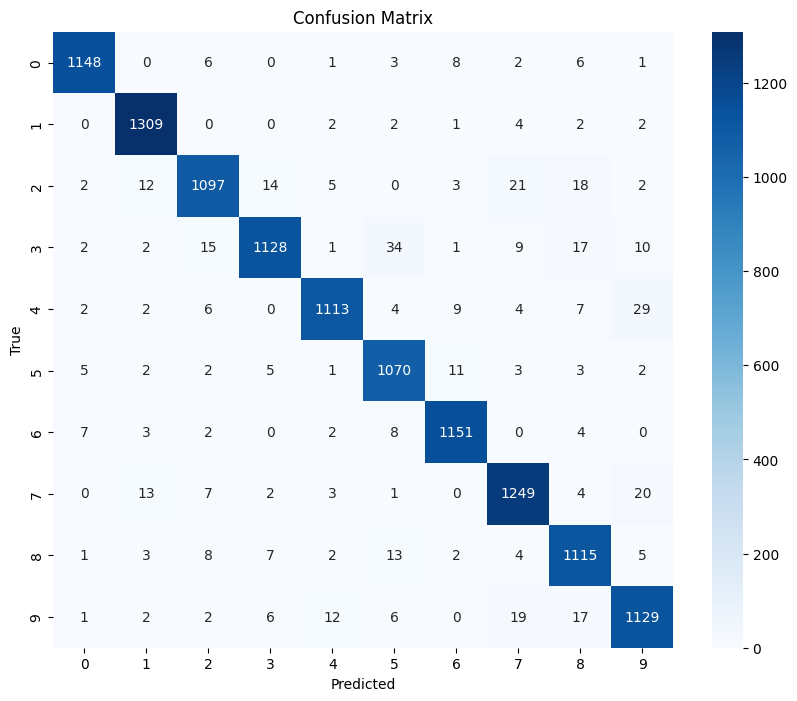

In [ ]:
#3.1.A
# sklearn.neural_network.MLPClassifier kullanarak bir MLP modeli oluşturuyorum

from sklearn.neural_network import MLPClassifier

# MLP modelini oluşturuyorum
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# Modeli eğitiyorum
mlp.fit(X_train_scaled, y_train)

# Modelin performansını değerlendiriyorum
print("Training set score: %f" % mlp.score(X_train_scaled, y_train))
print("Test set score: %f" % mlp.score(X_test_scaled, y_test))

# Tahminler yapıyorum
y_pred = mlp.predict(X_test_scaled)

# Sınıflandırma raporunu yazdırıyorum
print(classification_report(y_test, y_pred))

# Karmaşıklık matrisini yazdırıyorum
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Karmaşıklık matrisini görselleştiriyorum
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best score:
 0.9653125
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1       0.98      0.99      0.99      1322
           2       0.97      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.97      0.97      1299
           8       0.97      0.95      0.96      1160
           9       0.97      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

[[1153    0    3    0    2    3    4    1    5    4]
 [   0 1309    4    5    1

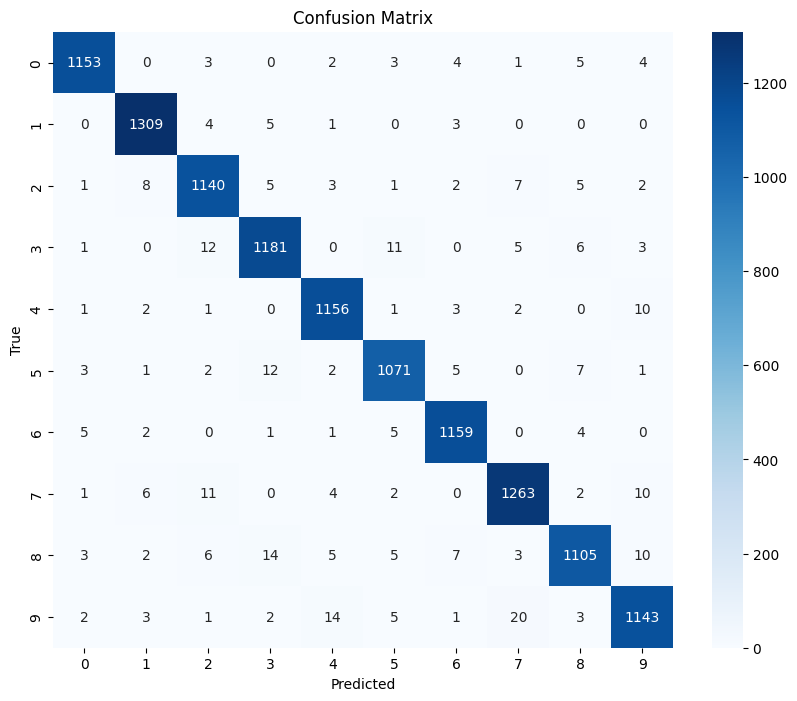

In [ ]:
#3.1.B

# Hiperparametre denemeleri için farklı katman sayıları, nöron sayıları ve aktivasyon fonksiyonlarını basit test ediyorum

from sklearn.model_selection import GridSearchCV

# Parametre grid'ini oluşturuyorum
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier(max_iter=10, random_state=1)

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train_scaled, y_train)

# En iyi parametreleri ve skoru yazdırıyorum
print('Best parameters found:\n', clf.best_params_)
print('Best score:\n', clf.best_score_)


# En iyi modeli kullanarak test setinde tahmin yapıyorum
y_pred = clf.predict(X_test_scaled)


# Sınıflandırma raporunu yazdırıyorum
print(classification_report(y_test, y_pred))

# Karmaşıklık matrisini yazdırıyorum
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Karmaşıklık matrisini görselleştiriyorum
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Best parameters found:
 {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (150,), 'alpha': 0.0001, 'activation': 'relu'}
Best score:
 0.9661458333333334
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1       0.98      0.99      0.99      1322
           2       0.96      0.97      0.97      1174
           3       0.97      0.96      0.97      1219
           4       0.98      0.98      0.98      1176
           5       0.97      0.96      0.97      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.97      0.97      1299
           8       0.97      0.96      0.97      1160
           9       0.97      0.97      0.97      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

[[1150    0    4    0    1    4    6    2    5    3]
 [   0 1310    

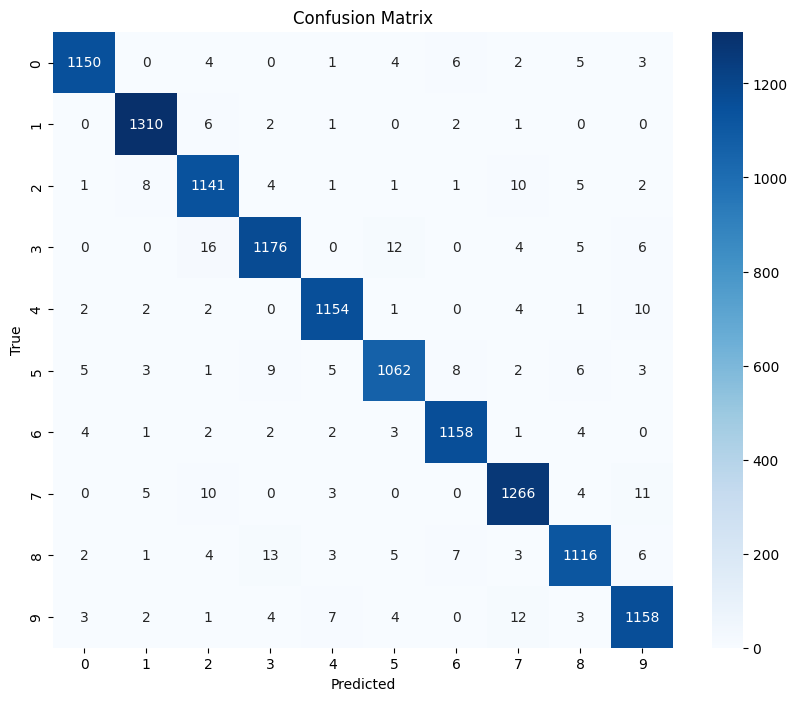

In [ ]:
#3.1.B

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Parametre grid'ini daha dar tutarak hızlandırıyorum
parameter_space = {
    'hidden_layer_sizes': [(50, 50), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],  # 'sgd' yerine sadece 'adam' kullanıyoruz, çünkü genelde daha hızlıdır
    'alpha': [0.0001, 0.001],
    'learning_rate': ['adaptive'],  # 'constant' yerine sadece 'adaptive' kullanıyorum
}

# Modeli oluşturuyoruz
mlp = MLPClassifier(max_iter=300, random_state=1, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

# RandomizedSearchCV kullanıyoruz (GridSearch yerine) ve 3 katlamalı çapraz doğrulama yapıyorum
clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=-1, n_iter=10, cv=3, random_state=1)

# Eğitim verisini kullanarak modeli eğitiyorum
clf.fit(X_train_scaled, y_train)

# En iyi parametreleri ve skoru yazdırıyoruz
print('Best parameters found:\n', clf.best_params_)
print('Best score:\n', clf.best_score_)

# En iyi modeli kullanarak test setinde tahmin yapıyorum
y_pred = clf.predict(X_test_scaled)

# Sınıflandırma raporunu yazdırıyorum
print(classification_report(y_test, y_pred))

# Karmaşıklık matrisini yazdırıyorum
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Karmaşıklık matrisini görselleştiriyorum
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#3.2.A ve 3.2.B
#keras kütüphanesinden RBF modeli oluşturuyorum

import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Layer

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[1]),
                                       initializer='uniform',
                                       trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = tf.expand_dims(inputs, axis=1) - self.centers
        l2 = tf.reduce_sum(tf.square(diff), axis=2)
        return tf.exp(-1 * self.gamma * l2)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

# RBF modeli oluşturma
model = keras.Sequential([
    RBFLayer(units=100, gamma=0.1, input_shape=(784,)), # Giriş katmanı
    Dense(10, activation='softmax') # Çıkış katmanı
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32) # X_train_scaled ve y_train'i kullanarak

# Model performansını değerlendirme yapıyorum
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', accuracy)

<ipython-input-30-84707e279329>:10: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(RBFLayer, self).__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.1092 - loss: 2.3019
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.1163 - loss: 2.3008
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.1129 - loss: 2.3011
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.1113 - loss: 2.3015
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.1113 - loss: 2.3016
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.1136 - loss: 2.3014
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.1094 - loss: 2.3018
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.1138 - loss: 2.3011
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.1099 - loss: 2.3017
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.1113 - loss: 2.3014
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1080 - loss: 2.3023
Test accuracy: 0.1101666

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


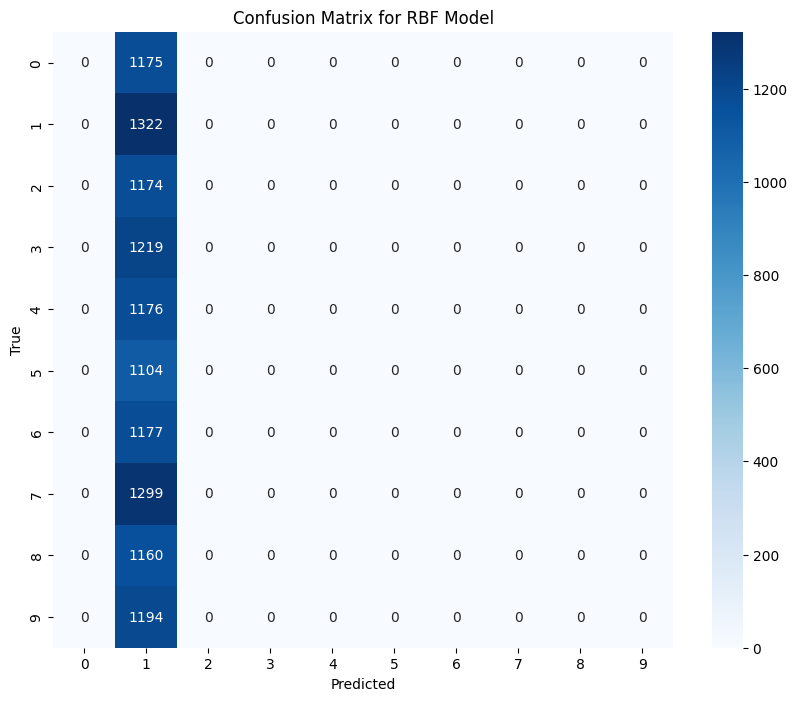

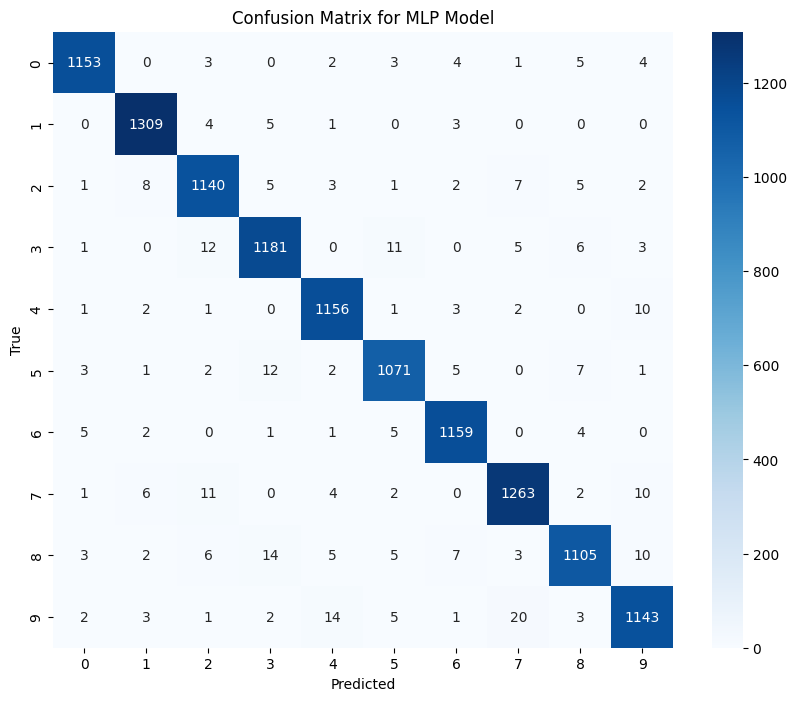

In [ ]:
#4.1.A ve 4.1.B
#ilgili veri setini kullanarak MLP , RBF modeli confusion_matrix i oluşturup ve seaborn ile görselleştirme yapıyorum

# RBF modelinin confusion matrisini hesaplama ve görselleştirme yapıyorum
from sklearn.metrics import confusion_matrix


# RBF modelinin tahminlerini al
y_pred_rbf = np.argmax(model.predict(X_test_scaled), axis=1)

# Confusion matrisini oluşturmame
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Confusion matrisini görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for RBF Model')
plt.show()


# MLP modelinin confusion matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP Model')
plt.show()

In [ ]:
#4.2.A

# sklearn.metrics.classification_report fonksiyonunu kullanarak MLP , RBF modeli  için accuracy, precision, recall, ve F1-score gibi metriklerinden hesaplamalar yapıyorum

from sklearn.metrics import classification_report

# MLP modelinin performansını değerlendirme
mlp_report = classification_report(y_test, y_pred, output_dict=True)

print("MLP Classification Report:")
print(classification_report(y_test, y_pred))


# RBF modelinin performansını değerlendirme
rbf_report = classification_report(y_test, y_pred_rbf, output_dict=True)

print("\nRBF Classification Report:")
print(classification_report(y_test, y_pred_rbf))

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1       0.98      0.99      0.99      1322
           2       0.97      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.98      0.98      1176
           5       0.97      0.97      0.97      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.97      0.97      1299
           8       0.97      0.95      0.96      1160
           9       0.97      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000


RBF Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1175
           1       0.11      1.00      0.20      1322
           2       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
# tensorflow ve scikeras yüklemeleri yapıyorum
!pip install scikit-learn numpy
!pip install scikeras
!pip install tensorflow scikit-learn

In [ ]:
#5.1.A ve 5.1.B
# MLP ve RBF modelleri için farklı hiperparametreleri deneyerek ve her denemede eğitim ve test sonuçlarını kaydediyorum
# RandomizedSearchCV ile hiperparametre optimizasyonu yaparak en iyi parametreleri buluyorum

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# MLP için hiperparametre aralığı
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Gizli katmanlar
    'activation': ['relu', 'tanh', 'logistic'],  # Aktivasyon fonksiyonları
    'solver': ['adam', 'sgd'],  # Öğrenme algoritmaları
    'alpha': np.logspace(-4, 1, 6),  # L2 düzenlileme cezası
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Öğrenme oranı stratejileri
    'max_iter': [200, 300, 500],  # Maksimum iterasyon sayısı
}

# MLP modelini oluşturma
mlp_model = MLPClassifier(random_state=42)
# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search_mlp = RandomizedSearchCV(mlp_model, param_distributions=param_dist_mlp, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# MLP modelini eğitme
random_search_mlp.fit(X_train, y_train)

# En iyi parametreler ve doğruluğu yazdırma
print(f"MLP Modeli - En İyi Parametreler: {random_search_mlp.best_params_}")
print(f"MLP Modeli - En İyi Doğruluk (CV): {random_search_mlp.best_score_}")

# Test verisi üzerindeki doğruluk
mlp_test_accuracy = random_search_mlp.score(X_test, y_test)
print(f"MLP Modeli - Test Doğruluğu: {mlp_test_accuracy}")

# RBF (SVM) için hiperparametre aralığı
param_dist_rbf = {
    'C': np.logspace(-2, 2, 5),  # Ceza parametresi
    'kernel': ['rbf'],  # RBF çekirdeği
    'gamma': ['scale', 'auto', 0.1, 1, 10],  # Gamma değeri
}

# RBF (SVM) modelini oluşturma
rbf_model = SVC(random_state=42)
# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search_rbf = RandomizedSearchCV(rbf_model, param_distributions=param_dist_rbf, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)
# RBF modelini eğitme
random_search_rbf.fit(X_train, y_train)

# En iyi parametreler ve doğruluğu yazdırma
print(f"RBF Modeli - En İyi Parametreler: {random_search_rbf.best_params_}")
print(f"RBF Modeli - En İyi Doğruluk (CV): {random_search_rbf.best_score_}")

# Test verisi üzerindeki doğruluk
rbf_test_accuracy = random_search_rbf.score(X_test, y_test)
print(f"RBF Modeli - Test Doğruluğu: {rbf_test_accuracy}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
MLP Modeli - En İyi Parametreler: {'solver': 'adam', 'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'tanh'}
MLP Modeli - En İyi Doğruluk (CV): 0.9642066654018846
MLP Modeli - Test Doğruluğu: 0.9796296296296296
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RBF (SVM) Modeli - En İyi Parametreler: {'kernel': 'rbf', 'gamma': 'scale', 'C': 0.1}
RBF (SVM) Modeli - En İyi Doğruluk (CV): 0.9427243407323088
RBF (SVM) Modeli - Test Doğruluğu: 0.9592592592592593
MLP Modeli daha iyi performans gösterdi. Test doğruluğu: 0.9796296296296296


In [ ]:
#5.2.A ve #5.2.B
#İlgili veri steine göre MLP ve RBF modellerinin sonuçlarını karşılaştırarak hangi modelin daha iyi performans gösterdiğini analiz ediyorum.
if mlp_test_accuracy > rbf_test_accuracy:
    print(f"MLP Modeli daha iyi performans gösterdi. Test doğruluğu: {mlp_test_accuracy}")
else:
    print(f"RBF  Modeli daha iyi performans gösterdi. Test doğruluğu: {rbf_test_accuracy}")

MLP Modeli daha iyi performans gösterdi. Test doğruluğu: 0.9796296296296296


Yaptığım çalışamlara göre MLP daha iyi sonuçlar gösteriyor(0.9796), bunun sebebi ise   RBF'nin büyük boyutlu verilerle daha fazla zorlanmasından kaynaklandığını öngörüyorum.

RBF performansını artırmak için RBF katmanının nöron sayısını veya aktivasyon fonksiyonlarını değiştirerek denemelerde yaptım ama sonuçlarda pek fazla değişiklik olmadı.

Model Eğitimi ve Hiperparametre Denemelerinde RandomizedSearchC, GridSearch ile çalıştım, RandomizedSearch rastgele kayıtlar üzerinde çalıştığı için daha iyi hızlı sonuçlar üretebildim.

